# Load Data

In [1]:
import pandas as pd
import numpy as np
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD

In [2]:
%cd /content

!unzip -qq "/content/drive/MyDrive/KDEF_All_V2.zip"

/content


In [3]:
# 불필요한 폴더 삭제
if os.path.exists("/content/KDEF_All_V2/Train/.ipynb_checkpoints"):
    shutil.rmtree("/content/KDEF_All_V2/Train/.ipynb_checkpoints")

if os.path.exists("/content/KDEF_All_V2/Test/.ipynb_checkpoints"):
    shutil.rmtree("/content/KDEF_All_V2/Test/.ipynb_checkpoints")

In [4]:
TRAIN_DIR = '/content/KDEF_All_V2/Train/'
TEST_DIR = '/content/KDEF_All_V2/Test/'

In [5]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        if label == '.DS_Store':
            continue
        for filename in os.listdir(directory+label):
            if filename == '.DS_Store':
                continue
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [6]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_All_V2/Train/surprised/BM27SUHL.JPG,surprised
1,/content/KDEF_All_V2/Train/surprised/AF19SUS_A...,surprised
2,/content/KDEF_All_V2/Train/neutral/AM26NEHR_AU...,neutral
3,/content/KDEF_All_V2/Train/happy/BM18HAHR_AUG.jpg,happy
4,/content/KDEF_All_V2/Train/disgusted/BM11DIFL_...,disgusted


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_All_V2/Test/surprised/BF03SUFR_A...,surprised
1,/content/KDEF_All_V2/Test/surprised/AM04SUS.JPG,surprised
2,/content/KDEF_All_V2/Test/surprised/BM05SUHR.JPG,surprised
3,/content/KDEF_All_V2/Test/surprised/AF01SUFR.JPG,surprised
4,/content/KDEF_All_V2/Test/surprised/BF08SUFL.JPG,surprised


# Exploratory Data Analysis

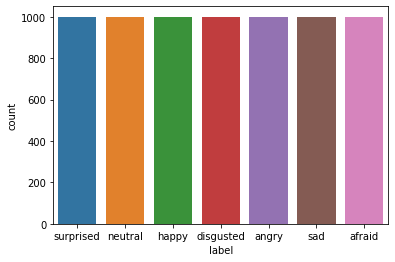

In [8]:
sns.countplot(train['label'])

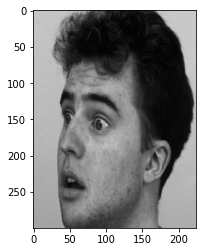

In [9]:
from PIL import Image

# center crop 적용 후, 224 x 300의 크기를 사용
img = Image.open(train['image'][0]).convert("L")
frac = 0.7
left = img.size[0]*((1-frac-0.3)/2)
upper = img.size[1]*((1-frac)/2)
right = img.size[0]-((1-frac-0.3)/2)*img.size[0]
bottom = img.size[1]-((1-frac)/2)*img.size[1]

cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
plt.imshow(cropped_img, cmap='gray');

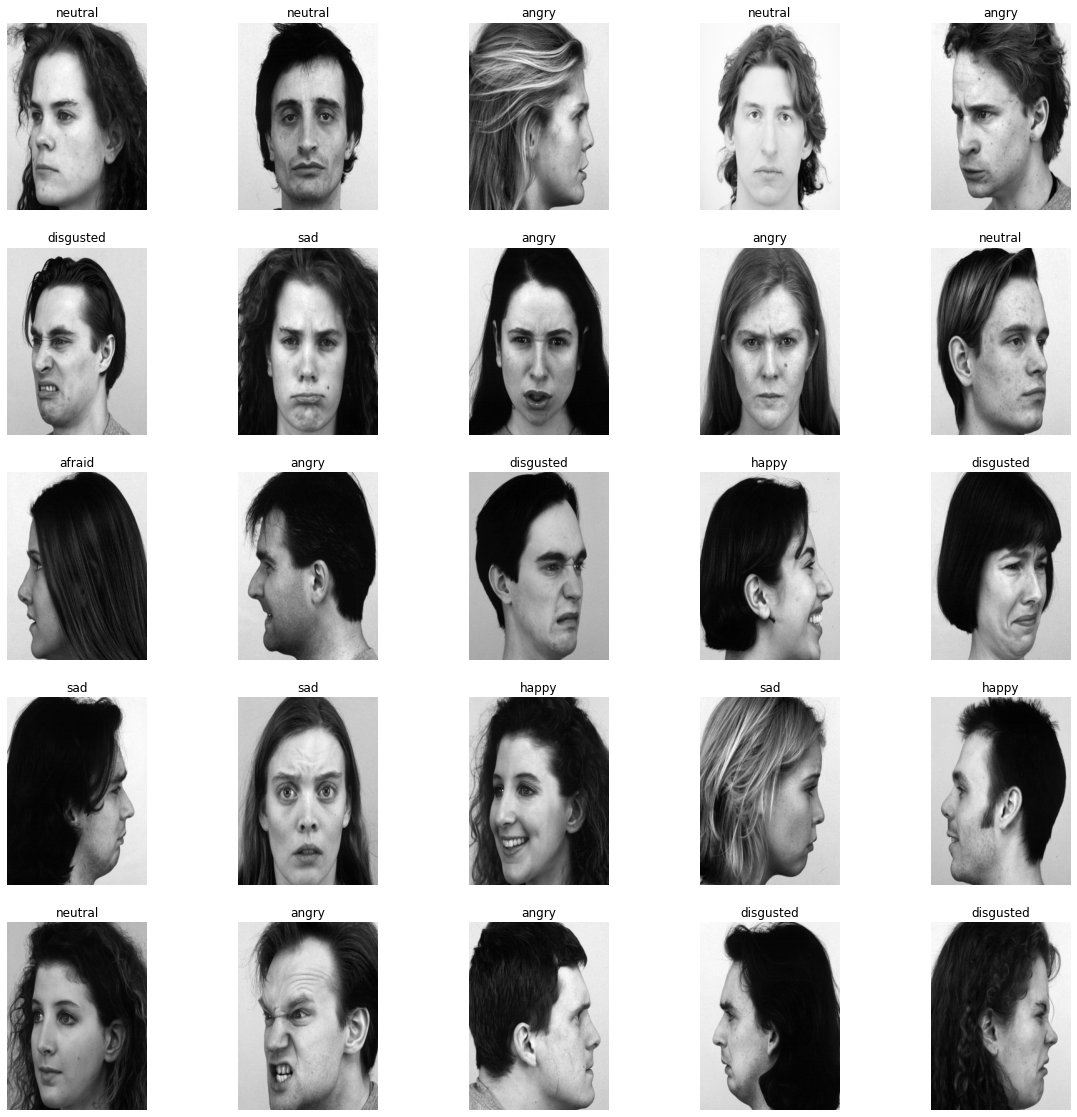

In [ ]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file, grayscale=True)
    cropped_img = img.crop((left, upper, right, bottom)).resize((224, 300), Image.ANTIALIAS)
    img = np.array(cropped_img)
    plt.imshow(cropped_img, cmap='gray')
    plt.title(label)
    plt.axis('off')

# Feature Extraction

In [23]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
        img = np.array(cropped_img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 300, 224, 1)
    print(features.shape)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/7000 [00:00<?, ?it/s]

(7000, 300, 224, 1)


In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/2800 [00:00<?, ?it/s]

(2800, 300, 224, 1)


In [ ]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
# one-hot encoding
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 1.]


# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         rotation_range=30,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         shear_range=0.1,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

In [ ]:
# train_generator = datagen.flow_from_directory(
#     TRAIN_DIR,
#     color_mode='grayscale',
#     target_size=(300,224),
#     batch_size=32,
#     class_mode='categorical',
#     shuffle=True)

Found 3500 images belonging to 7 classes.


In [ ]:
# 예시 출력
# plt.figure(figsize=(20,20))
# iterations = 1

# for index, (images, labels) in enumerate(train_generator):
#     for i in range(20):
#         img = np.array(images[i].reshape(300, 224))
#         plt.subplot(5, 5, i+1)
#         plt.imshow(img, cmap='gray')
#         plt.title(le.classes_[np.argmax(labels[i])])
#         plt.axis('off')
#     if index is iterations - 1:
#         break

# Model Creation

In [ ]:
# config
input_shape = (300, 224, 1)
output_class = 7

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(output_class, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 222, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 111, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 149, 111, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 109, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 54, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 73, 54, 256)       0

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))
# history = model.fit_generator(train_generator,
#        epochs=100,
#        validation_data=(x_test, y_test))

Epoch 1/100
110/110 [==============================] - 29s 154ms/step - loss: 1.9524 - accuracy: 0.1497 - val_loss: 1.9451 - val_accuracy: 0.1586
Epoch 2/100
110/110 [==============================] - 14s 131ms/step - loss: 1.9420 - accuracy: 0.1659 - val_loss: 1.9444 - val_accuracy: 0.1818
Epoch 3/100
110/110 [==============================] - 14s 131ms/step - loss: 1.9358 - accuracy: 0.1707 - val_loss: 1.9436 - val_accuracy: 0.1839
Epoch 4/100
110/110 [==============================] - 14s 131ms/step - loss: 1.9297 - accuracy: 0.1803 - val_loss: 1.9420 - val_accuracy: 0.1968
Epoch 5/100
110/110 [==============================] - 14s 131ms/step - loss: 1.9229 - accuracy: 0.1846 - val_loss: 1.9405 - val_accuracy: 0.2021
Epoch 6/100
110/110 [==============================] - 14s 130ms/step - loss: 1.9165 - accuracy: 0.1820 - val_loss: 1.9389 - val_accuracy: 0.2154
Epoch 7/100
110/110 [==============================] - 14s 130ms/step - loss: 1.9077 - accuracy: 0.1931 - val_loss: 1.9363 -

# Plot the Results

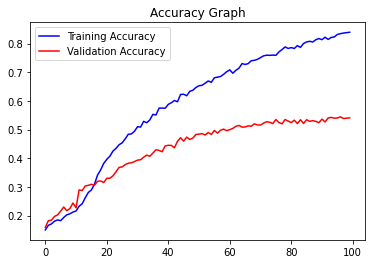

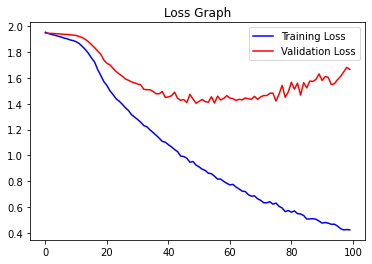

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

# Save Model

In [ ]:
model.save('fer_normal_v2.h5')

In [ ]:
!cp fer_normal_v2.h5 /content/drive/MyDrive

# Test with Image Data

Original Output: angry
1/1 [==============================] - 0s 19ms/step
Predicted Output: angry


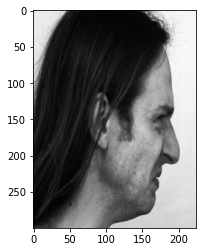

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 300, 224, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(300, 224), cmap='gray');

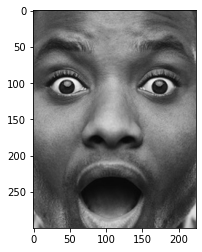

In [ ]:
from PIL import Image

# center crop 적용 후, 224 x 300의 크기를 사용
img = Image.open("face_surprised.jpeg").convert("L")
frac = 0.5
left = img.size[0]*((1-frac)/2)
upper = img.size[1]*((1-frac)/2)
right = img.size[0]-((1-frac)/2)*img.size[0]
bottom = img.size[1]-((1-frac)/2)*img.size[1]

cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
img = np.array(cropped_img)
plt.imshow(img, cmap='gray');

In [ ]:
pred = loaded_model.predict(img.reshape(1, 300, 224, 1))
print(le.classes_)
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)

1/1 [==============================] - 0s 26ms/step
['afraid' 'angry' 'disgusted' 'happy' 'neutral' 'sad' 'surprised']
Predicted Output: afraid


# Load Model

In [10]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/fer_normal_v2.h5')

# Visualize Model

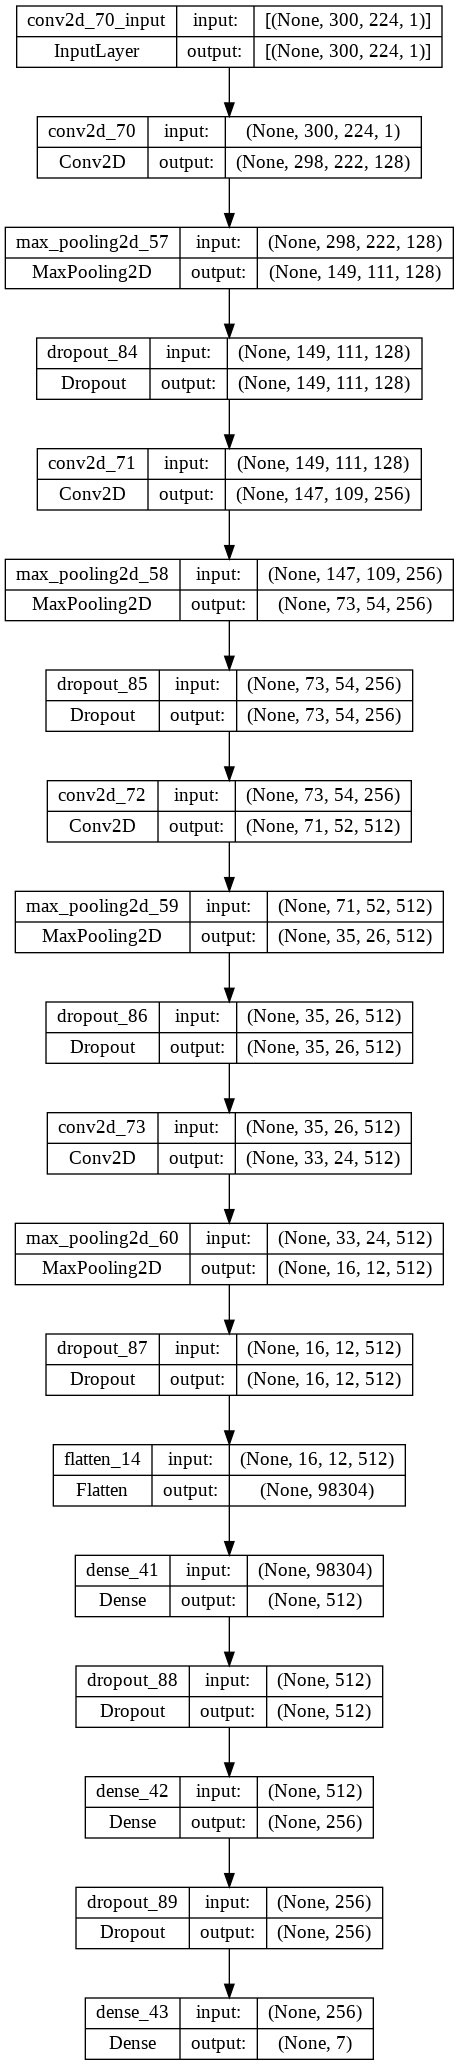

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(loaded_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 38.9 MB/s 


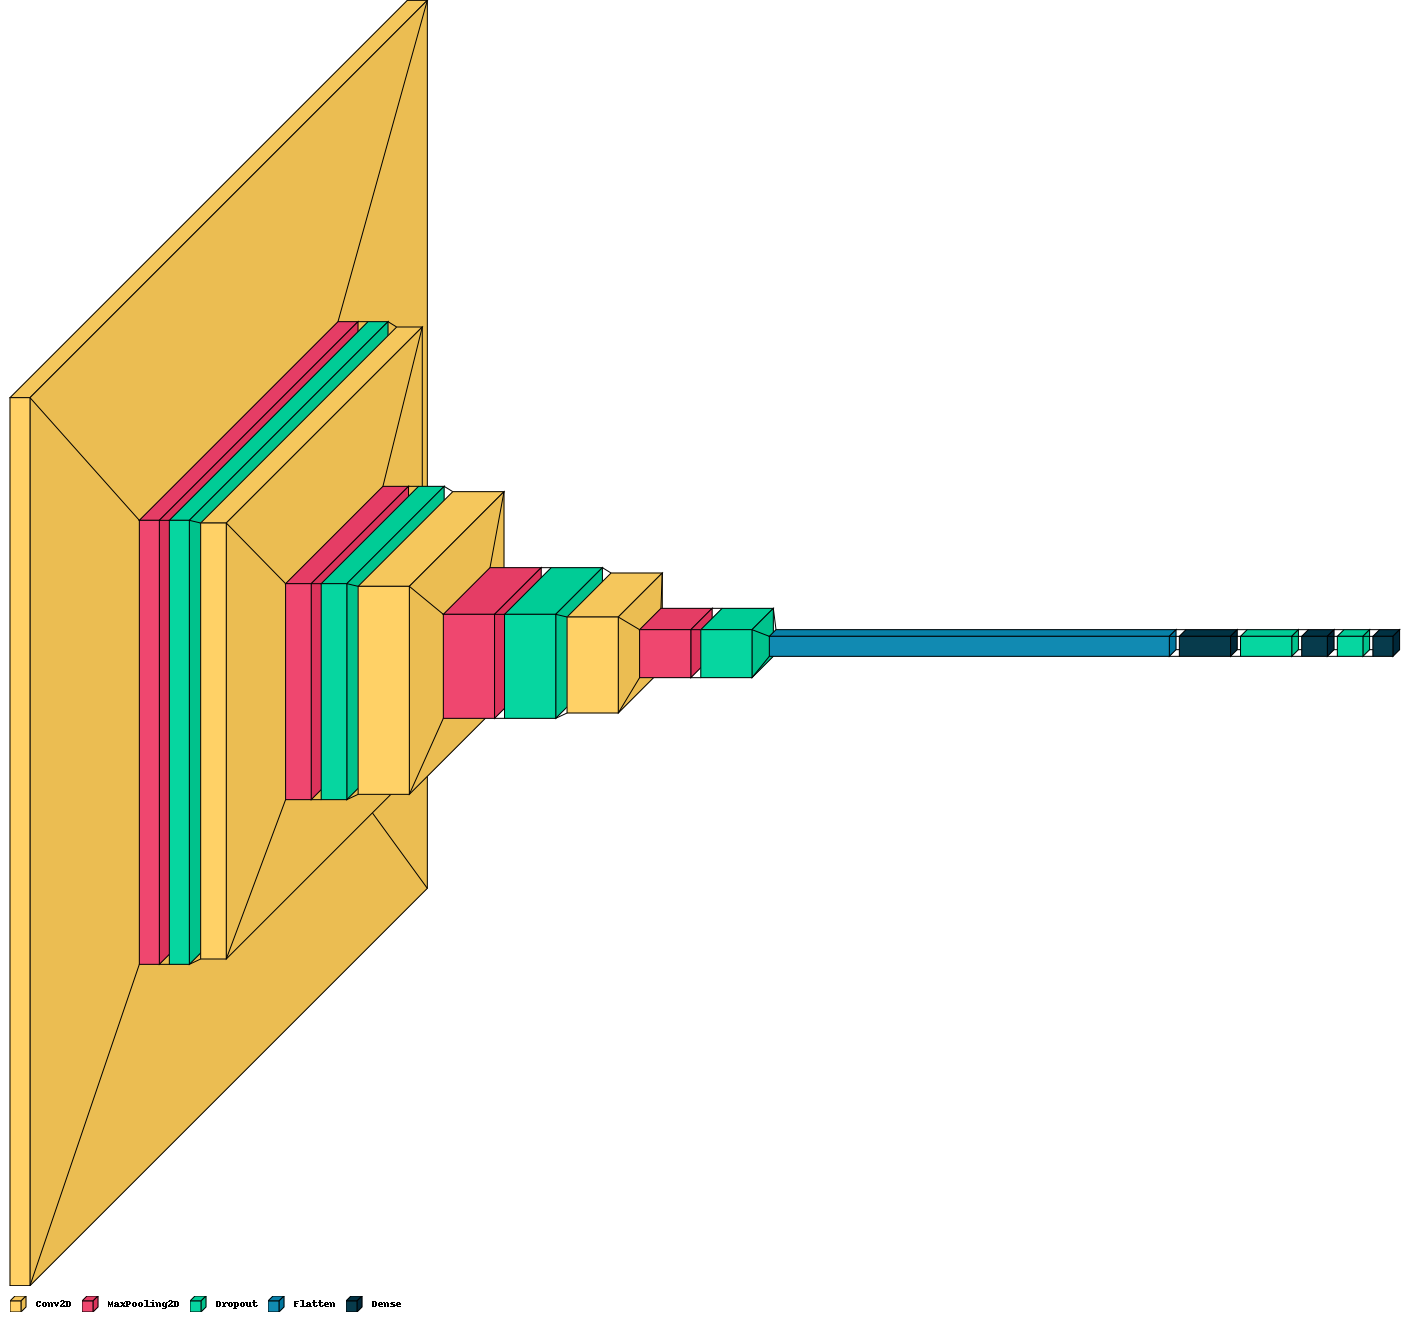

In [ ]:
import visualkeras
from PIL import ImageFont

visualkeras.layered_view(loaded_model, legend=True)

# Evaluate Model

In [ ]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

88/88 [==============================] - 12s 29ms/step - loss: 1.6653 - accuracy: 0.5407


In [ ]:
print(f'Accuracy : {score[1]} Loss: {score[0]}')

Accuracy : 0.5407142639160156 Loss: 1.6652582883834839


# Evaluate Model Only with Angle

In [3]:
%cd /content

!unzip -qq "/content/drive/MyDrive/KDEF_TEST_FullLeft_V2.zip"

/content


In [4]:
!unzip -qq "/content/drive/MyDrive/KDEF_TEST_HalfLeft_V2.zip"

In [5]:
!unzip -qq "/content/drive/MyDrive/KDEF_TEST_Straight_V2.zip"

In [6]:
!unzip -qq "/content/drive/MyDrive/KDEF_TEST_HalfRight_V2.zip"

In [7]:
!unzip -qq "/content/drive/MyDrive/KDEF_TEST_FullRight_V2.zip"

## Full Left

In [52]:
TEST_DIR_FullLeft = '/content/KDEF_TEST_FullLeft_V2/'

In [53]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_FullLeft)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_TEST_FullLeft_V2/surprised/BF08S...,surprised
1,/content/KDEF_TEST_FullLeft_V2/surprised/BM07S...,surprised
2,/content/KDEF_TEST_FullLeft_V2/surprised/AM06S...,surprised
3,/content/KDEF_TEST_FullLeft_V2/surprised/BM08S...,surprised
4,/content/KDEF_TEST_FullLeft_V2/surprised/BF04S...,surprised


In [54]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/560 [00:00<?, ?it/s]

(560, 300, 224, 1)


In [55]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(test['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [57]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

18/18 [==============================] - 2s 128ms/step - loss: 1.7477 - accuracy: 0.4929


## Half Left

In [58]:
TEST_DIR_HalfLeft = '/content/KDEF_TEST_HalfLeft_V2/'

In [59]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_HalfLeft)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_TEST_HalfLeft_V2/surprised/BF05S...,surprised
1,/content/KDEF_TEST_HalfLeft_V2/surprised/BF03S...,surprised
2,/content/KDEF_TEST_HalfLeft_V2/surprised/AF03S...,surprised
3,/content/KDEF_TEST_HalfLeft_V2/surprised/AM02S...,surprised
4,/content/KDEF_TEST_HalfLeft_V2/surprised/BF08S...,surprised


In [60]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/560 [00:00<?, ?it/s]

(560, 300, 224, 1)


In [61]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(test['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [62]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

18/18 [==============================] - 2s 128ms/step - loss: 1.6107 - accuracy: 0.5679


## Straight

In [63]:
TEST_DIR_Straight = '/content/KDEF_TEST_Straight_V2/'

In [64]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_Straight)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_TEST_Straight_V2/surprised/AM04S...,surprised
1,/content/KDEF_TEST_Straight_V2/surprised/BM08S...,surprised
2,/content/KDEF_TEST_Straight_V2/surprised/AM02S...,surprised
3,/content/KDEF_TEST_Straight_V2/surprised/BM07S...,surprised
4,/content/KDEF_TEST_Straight_V2/surprised/AF08S...,surprised


In [65]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/560 [00:00<?, ?it/s]

(560, 300, 224, 1)


In [66]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(test['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [67]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

18/18 [==============================] - 2s 127ms/step - loss: 1.6207 - accuracy: 0.5786


## Half Right

In [68]:
TEST_DIR_HalfRight = '/content/KDEF_TEST_HalfRight_V2/'

In [69]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_HalfRight)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_TEST_HalfRight_V2/surprised/BM05...,surprised
1,/content/KDEF_TEST_HalfRight_V2/surprised/BF05...,surprised
2,/content/KDEF_TEST_HalfRight_V2/surprised/BM09...,surprised
3,/content/KDEF_TEST_HalfRight_V2/surprised/BF03...,surprised
4,/content/KDEF_TEST_HalfRight_V2/surprised/BM06...,surprised


In [70]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/560 [00:00<?, ?it/s]

(560, 300, 224, 1)


In [71]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(test['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [72]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

18/18 [==============================] - 2s 127ms/step - loss: 1.5881 - accuracy: 0.5732


## Full Right

In [73]:
TEST_DIR_FullRight = '/content/KDEF_TEST_FullRight_V2/'

In [74]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_FullRight)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_TEST_FullRight_V2/surprised/BF03...,surprised
1,/content/KDEF_TEST_FullRight_V2/surprised/AF01...,surprised
2,/content/KDEF_TEST_FullRight_V2/surprised/AM05...,surprised
3,/content/KDEF_TEST_FullRight_V2/surprised/AM02...,surprised
4,/content/KDEF_TEST_FullRight_V2/surprised/AM10...,surprised


In [75]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/560 [00:00<?, ?it/s]

(560, 300, 224, 1)


In [76]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(test['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [77]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

18/18 [==============================] - 2s 127ms/step - loss: 1.7591 - accuracy: 0.4911


# Evaluate Model Only with Emotion

In [11]:
%cd /content

!unzip -qq "/content/drive/MyDrive/KDEF_TEST_Afraid_V2.zip"

/content


In [12]:
!unzip -qq "/content/drive/MyDrive/KDEF_TEST_Angry_V2.zip"

In [13]:
!unzip -qq "/content/drive/MyDrive/KDEF_TEST_Disgusted_V2.zip"

In [14]:
!unzip -qq "/content/drive/MyDrive/KDEF_TEST_Happy_V2.zip"

In [15]:
!unzip -qq "/content/drive/MyDrive/KDEF_TEST_Neutral_V2.zip"

In [16]:
!unzip -qq "/content/drive/MyDrive/KDEF_TEST_Sad_V2.zip"

In [17]:
!unzip -qq "/content/drive/MyDrive/KDEF_TEST_Surprised_V2.zip"

## Afraid

In [98]:
TEST_DIR_Afraid = '/content/KDEF_TEST_Afraid_V2/'

In [99]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_Afraid)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_TEST_Afraid_V2/afraid/BF06AFS_AU...,afraid
1,/content/KDEF_TEST_Afraid_V2/afraid/AM07AFHR.JPG,afraid
2,/content/KDEF_TEST_Afraid_V2/afraid/BF08AFHR_A...,afraid
3,/content/KDEF_TEST_Afraid_V2/afraid/AM07AFHL.JPG,afraid
4,/content/KDEF_TEST_Afraid_V2/afraid/AM04AFHL_A...,afraid


In [100]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/400 [00:00<?, ?it/s]

(400, 300, 224, 1)


In [101]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [102]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

13/13 [==============================] - 2s 132ms/step - loss: 3.1093 - accuracy: 0.2300


## Angry

In [103]:
TEST_DIR_Angry = '/content/KDEF_TEST_Angry_V2/'

In [104]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_Angry)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_TEST_Angry_V2/angry/BF08ANHL.JPG,angry
1,/content/KDEF_TEST_Angry_V2/angry/BF06ANFL_AUG...,angry
2,/content/KDEF_TEST_Angry_V2/angry/AF02ANFR.JPG,angry
3,/content/KDEF_TEST_Angry_V2/angry/AM04ANFL.JPG,angry
4,/content/KDEF_TEST_Angry_V2/angry/AF10ANFR_AUG...,angry


In [105]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/400 [00:00<?, ?it/s]

(400, 300, 224, 1)


In [106]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [107]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

13/13 [==============================] - 2s 132ms/step - loss: 0.9870 - accuracy: 0.7425


## Disgusted

In [108]:
TEST_DIR_Disgusted = '/content/KDEF_TEST_Disgusted_V2/'

In [109]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_Disgusted)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_TEST_Disgusted_V2/disgusted/AF07...,disgusted
1,/content/KDEF_TEST_Disgusted_V2/disgusted/BF08...,disgusted
2,/content/KDEF_TEST_Disgusted_V2/disgusted/AF09...,disgusted
3,/content/KDEF_TEST_Disgusted_V2/disgusted/BM08...,disgusted
4,/content/KDEF_TEST_Disgusted_V2/disgusted/BF04...,disgusted


In [110]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/400 [00:00<?, ?it/s]

(400, 300, 224, 1)


In [111]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [112]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

13/13 [==============================] - 2s 134ms/step - loss: 1.8717 - accuracy: 0.4650


## Happy

In [113]:
TEST_DIR_Happy= '/content/KDEF_TEST_Happy_V2/'

In [114]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_Happy)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_TEST_Happy_V2/happy/AM07HAS.JPG,happy
1,/content/KDEF_TEST_Happy_V2/happy/BM03HAFL_AUG...,happy
2,/content/KDEF_TEST_Happy_V2/happy/BM06HAHR.JPG,happy
3,/content/KDEF_TEST_Happy_V2/happy/AM10HAHR.JPG,happy
4,/content/KDEF_TEST_Happy_V2/happy/AM01HAS_AUG.jpg,happy


In [115]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/400 [00:00<?, ?it/s]

(400, 300, 224, 1)


In [116]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [117]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

13/13 [==============================] - 2s 134ms/step - loss: 0.7252 - accuracy: 0.8375


## Neutral

In [118]:
TEST_DIR_Neutral = '/content/KDEF_TEST_Neutral_V2/'

In [119]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_Neutral)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_TEST_Neutral_V2/neutral/AM07NEHL...,neutral
1,/content/KDEF_TEST_Neutral_V2/neutral/BM04NEFR...,neutral
2,/content/KDEF_TEST_Neutral_V2/neutral/BF10NES.JPG,neutral
3,/content/KDEF_TEST_Neutral_V2/neutral/BM01NEHR...,neutral
4,/content/KDEF_TEST_Neutral_V2/neutral/BF07NEHR...,neutral


In [120]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/400 [00:00<?, ?it/s]

(400, 300, 224, 1)


In [121]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [122]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

13/13 [==============================] - 2s 132ms/step - loss: 1.2824 - accuracy: 0.5600


## Sad

In [123]:
TEST_DIR_Sad = '/content/KDEF_TEST_Sad_V2/'

In [124]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_Sad)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_TEST_Sad_V2/sad/BF06SAHR_AUG.jpg,sad
1,/content/KDEF_TEST_Sad_V2/sad/AF01SAHL_AUG.jpg,sad
2,/content/KDEF_TEST_Sad_V2/sad/BF05SAHR.JPG,sad
3,/content/KDEF_TEST_Sad_V2/sad/BF01SAS_AUG.jpg,sad
4,/content/KDEF_TEST_Sad_V2/sad/BM09SAFL_AUG.jpg,sad


In [125]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/400 [00:00<?, ?it/s]

(400, 300, 224, 1)


In [126]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [127]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

13/13 [==============================] - 2s 130ms/step - loss: 2.1566 - accuracy: 0.3925


## Surprised

In [128]:
TEST_DIR_Surprised = '/content/KDEF_TEST_Surprised_V2/'

In [129]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR_Surprised)
test.head()

surprised Completed
sad Completed
neutral Completed
happy Completed
disgusted Completed
angry Completed
afraid Completed


,image,label
0,/content/KDEF_TEST_Surprised_V2/surprised/BF03...,surprised
1,/content/KDEF_TEST_Surprised_V2/surprised/AM04...,surprised
2,/content/KDEF_TEST_Surprised_V2/surprised/BM05...,surprised
3,/content/KDEF_TEST_Surprised_V2/surprised/AF01...,surprised
4,/content/KDEF_TEST_Surprised_V2/surprised/BF08...,surprised


In [130]:
test_features = extract_features(test['image'])
x_test = test_features/255.0

  0%|          | 0/400 [00:00<?, ?it/s]

(400, 300, 224, 1)


In [131]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_test = le.transform(test['label'])
y_test = to_categorical(y_test, num_classes=7)

In [132]:
score = loaded_model.evaluate(x_test, y_test, verbose = 1)

13/13 [==============================] - 2s 133ms/step - loss: 1.5247 - accuracy: 0.5575
